In [74]:
#to create pandas dataframe
import pandas as pd
#to count words
from sklearn.feature_extraction.text import CountVectorizer
#for naive bayes model
from sklearn.naive_bayes import MultinomialNB
#for splitting training from test set
from sklearn.model_selection import train_test_split
#for removing stopwords from tweets

df = pd.read_csv( '/Users/neilwatt/Documents/Python/Tweets.csv', encoding = "ISO-8859-1")
df



,Tweet,Class
0,"a very Low IQ individual, has received too ma...",Donald_Trump
1,"year ago the pundits & talking heads, people ...",Donald_Trump
2,....The greatest Witch Hunt in political history!,Donald_Trump
3,"...n, who ran the campaign, never had the guts...",Donald_Trump
4,...realize the economy is the best itÍs ever b...,Donald_Trump
5,...This is a level of criminality beyond the p...,Donald_Trump
6,"""The end of the holy month of Ramadan is a tim...",Theresa_May
7,A huge thank you to everyone who gave their ti...,Theresa_May
8,A quarter of the worldÍs population are living...,Jeremy_Corbyn
9,"A week today, you have an important decision t...",Theresa_May


In [107]:
import numpy as np
from collections import Counter
#I am interested in counting the most frequently used words

#count Theresa May words
count1 = Counter(" ".join(df[df['Class']=='Theresa_May']["Tweet"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "Theresa_May words", 1 : "count"})


#count Trump words
count2 = Counter(" ".join(df[df['Class']=='Donald_Trump']["Tweet"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "Trump words", 1 : "count"})

#count Corbyn words
count3 = Counter(" ".join(df[df['Class']=='Jeremy_Corbyn']["Tweet"]).split()).most_common(20)
df3 = pd.DataFrame.from_dict(count3)
df3 = df3.rename(columns={0: "Corbyn words", 1 : "count"})

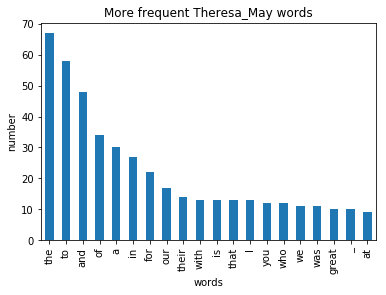

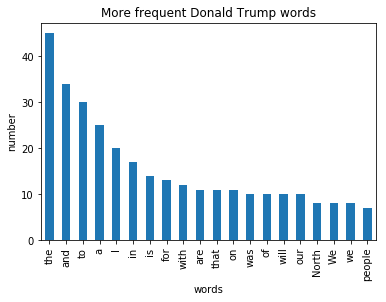

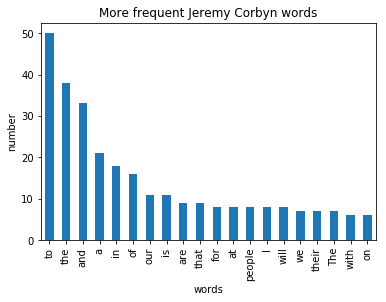

In [108]:
import matplotlib.pyplot as plt

df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["Theresa_May words"]))
plt.xticks(y_pos, df1["Theresa_May words"])
plt.title('More frequent Theresa_May words')
plt.xlabel('words')
plt.ylabel('number')
plt.savefig('Theresa_May_words.png')
plt.show()


df2.plot.bar(legend = False)
y_pos = np.arange(len(df2["Trump words"]))
plt.xticks(y_pos, df2["Trump words"])
plt.title('More frequent Donald Trump words')
plt.xlabel('words')
plt.ylabel('number')
plt.savefig('Trump_Words.png')
plt.show()


df3.plot.bar(legend = False)
y_pos = np.arange(len(df3["Corbyn words"]))
plt.xticks(y_pos, df3["Corbyn words"])
plt.title('More frequent Jeremy Corbyn words')
plt.xlabel('words')
plt.ylabel('number')
plt.savefig('Corbyn_Words.png')
plt.show()



In [75]:

#splitting the df into train and test
countvectorizer = CountVectorizer()
counts = countvectorizer.fit_transform(df['Tweet'].values)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(counts, df['Class'].values, train_size=0.75, random_state=1)






/Users/neilwatt/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [76]:

classifier = MultinomialNB()
classifier.fit(training_inputs, training_classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [1]:
classifier

NameError: name 'classifier' is not defined

In [77]:
examples = ['solidarity','fake news','inspirational']
example_counts = countvectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array(['Jeremy_Corbyn', 'Donald_Trump', 'Theresa_May'],
      dtype='<U13')

In [42]:
#for t and p statistics
#from scipy import stats
#stats.ttest_ind(solidarity, Jeremy_Corbyn)

In [78]:
classifier.score(testing_inputs, testing_classes)

0.56666666666666665

In [110]:
import nltk
#nltk.download('popular')

from stop_words import get_stop_words
stop_words = get_stop_words('english')
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [111]:
#df['lowercase']=df['Tweet'].str.lower()
#df['lowercase']

0       a very low iq individual, has received too ma...
1       year ago the pundits & talking heads, people ...
2      ....the greatest witch hunt in political history!
3      ...n, who ran the campaign, never had the guts...
4      ...realize the economy is the best itís ever b...
5      ...this is a level of criminality beyond the p...
6      "the end of the holy month of ramadan is a tim...
7      a huge thank you to everyone who gave their ti...
8      a quarter of the worldís population are living...
9      a week today, you have an important decision t...
10     absolutely tragic that millions of people face...
11     against all the odds, stephen hawking inspired...
12     as muslims all around the world continue to ce...
13     as we celebrate its 70th birthday, i am determ...
14     before taking office people were assuming that...
15     congratulations on winning the for. i'm lookin...
16     congratulations to on his huge win in . we nee...
17     delighted to have from t

In [112]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')



df['tweet_without_stopwords'] = df['Tweet'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [113]:
df['tweet_without_stopwords'].values

array([ 'low iq individual, received many shots head real boxers movies. watched last night truly believe may ñpunch-drunk.î guess doesnít...',
       'year ago pundits & talking heads, people couldnít job before, begging conciliation peace - ñplease meet, donít go war.î meet great relationship kim jong un, haters shout out, ñyou shouldnít meet, meet!î',
       '....the greatest witch hunt political history!',
       '...n, ran campaign, never guts bring ridiculous case, lingered office almost 2 years. resigned office disgrace, disciples brought would settle.',
       '...realize economy best itís ever employment time high, many companies pouring back country. wake punchy!',
       '...this level criminality beyond pale. grave abuse power authority, itís like nothing else weíve seen history. makes nixon watergate burglary look like keystone cop stuff',
       '"the end holy month ramadan time muslims come together family, friends neighbours. itís opportunity spiritual renewal."',
     

In [116]:
df

,Tweet,Class,lowercase,tweet_without_stopwords
0,"a very Low IQ individual, has received too ma...",Donald_Trump,"a very low iq individual, has received too ma...","low iq individual, received many shots head re..."
1,"year ago the pundits & talking heads, people ...",Donald_Trump,"year ago the pundits & talking heads, people ...","year ago pundits & talking heads, people could..."
2,....The greatest Witch Hunt in political history!,Donald_Trump,....the greatest witch hunt in political history!,....the greatest witch hunt political history!
3,"...n, who ran the campaign, never had the guts...",Donald_Trump,"...n, who ran the campaign, never had the guts...","...n, ran campaign, never guts bring ridiculou..."
4,...realize the economy is the best itÍs ever b...,Donald_Trump,...realize the economy is the best itís ever b...,...realize economy best itís ever employment t...
5,...This is a level of criminality beyond the p...,Donald_Trump,...this is a level of criminality beyond the p...,...this level criminality beyond pale. grave a...
6,"""The end of the holy month of Ramadan is a tim...",Theresa_May,"""the end of the holy month of ramadan is a tim...","""the end holy month ramadan time muslims come ..."
7,A huge thank you to everyone who gave their ti...,Theresa_May,a huge thank you to everyone who gave their ti...,huge thank everyone gave time campaign. strong...
8,A quarter of the worldÍs population are living...,Jeremy_Corbyn,a quarter of the worldís population are living...,quarter worldís population living poverty. one...
9,"A week today, you have an important decision t...",Theresa_May,"a week today, you have an important decision t...","week today, important decision make runs servi..."


In [121]:
#we will now re-count the most frequent words now that the data has been "cleansed" of stopwords
import numpy as np
from collections import Counter

#count Theresa May words
cleancount1 = Counter(" ".join(df[df['Class']=='Theresa_May']["tweet_without_stopwords"]).split()).most_common(20)
cleandf1 = pd.DataFrame.from_dict(cleancount1)
cleandf1 = cleandf1.rename(columns={0: "Clean Theresa_May words", 1 : "count"})

#count Trump words
cleancount2 = Counter(" ".join(df[df['Class']=='Donald_Trump']["tweet_without_stopwords"]).split()).most_common(20)
cleandf2 = pd.DataFrame.from_dict(cleancount2)
cleandf2 = cleandf2.rename(columns={0: "Clean Trump words", 1 : "count"})

#count Corbyn words
cleancount3 = Counter(" ".join(df[df['Class']=='Jeremy_Corbyn']["tweet_without_stopwords"]).split()).most_common(20)
cleandf3 = pd.DataFrame.from_dict(cleancount3)
cleandf3 = cleandf3.rename(columns={0: "Clean Corbyn words", 1 : "count"})

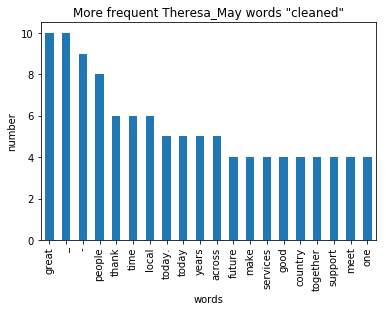

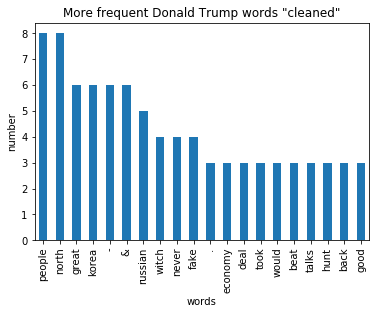

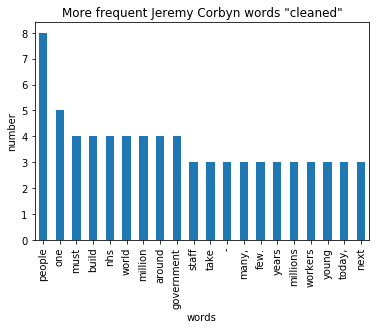

In [123]:
#Plotting cleaned frequencies
cleandf1.plot.bar(legend = False)
y_pos = np.arange(len(cleandf1["Clean Theresa_May words"]))
plt.xticks(y_pos, cleandf1["Clean Theresa_May words"])
plt.title('More frequent Theresa_May words "cleaned"')
plt.xlabel('words')
plt.ylabel('number')
plt.savefig('clean_Theresa_May_words.png')
plt.show()

cleandf2.plot.bar(legend = False)
y_pos = np.arange(len(cleandf2["Clean Trump words"]))
plt.xticks(y_pos, cleandf2["Clean Trump words"])
plt.title('More frequent Donald Trump words "cleaned"')
plt.xlabel('words')
plt.ylabel('number')
plt.savefig('clean_Trump_Words.png')
plt.show()


cleandf3.plot.bar(legend = False)
y_pos = np.arange(len(cleandf3["Clean Corbyn words"]))
plt.xticks(y_pos, cleandf3["Clean Corbyn words"])
plt.title('More frequent Jeremy Corbyn words "cleaned"')
plt.xlabel('words')
plt.ylabel('number')
plt.savefig('clean_Corbyn_Words.png')
plt.show()

In [127]:

#splitting the df into train and test using CLEANED data
countvectorizer = CountVectorizer()
counts = countvectorizer.fit_transform(df['tweet_without_stopwords'].values)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(counts, df['Class'].values, train_size=0.75, random_state=1)






/Users/neilwatt/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [128]:
classifierclean = MultinomialNB()
classifierclean.fit(training_inputs, training_classes)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [129]:


examples = ['solidarity','fake news','inspirational']
example_counts = countvectorizer.transform(examples)
predictions = classifierclean.predict(example_counts)
predictions

array(['Jeremy_Corbyn', 'Donald_Trump', 'Theresa_May'],
      dtype='<U13')

In [130]:
classifierclean.score(testing_inputs, testing_classes)

0.59999999999999998